In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
sb.set()
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import math
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
googleplayclean = pd.read_csv('C:/Users/davyn/OneDrive/Documents/GitHub/play-store-analysis/googleplayclean.csv')
puzzle = googleplayclean.copy()
arcade = googleplayclean.copy()
casual = googleplayclean.copy()
sim = googleplayclean.copy()
action = googleplayclean.copy()
adv = googleplayclean.copy()

In [3]:
googleplayclean.shape

(182502, 16)

In [4]:
googleplayclean['Category'].value_counts()

Puzzle          29946
Arcade          29177
Casual          27532
Simulation      18190
Action          17094
Adventure       14994
Role Playing     7758
Racing           7147
Trivia           6992
Board            6789
Strategy         5670
Card             5618
Word             5595
Name: Category, dtype: int64

In [5]:
googleplayclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182502 entries, 0 to 182501
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        182502 non-null  int64  
 1   Category          182502 non-null  object 
 2   Rating            182502 non-null  object 
 3   Rating Count      182502 non-null  float64
 4   Installs          182502 non-null  object 
 5   Free              182502 non-null  bool   
 6   Price             182502 non-null  float64
 7   Size              182502 non-null  float64
 8   Last Updated      182502 non-null  object 
 9   Content Rating    182502 non-null  object 
 10  Ad Supported      182502 non-null  bool   
 11  In App Purchases  182502 non-null  bool   
 12  Editors Choice    182502 non-null  bool   
 13  Scraped Time      182502 non-null  object 
 14  Success           182502 non-null  bool   
 15  Time Gap          182502 non-null  int64  
dtypes: bool(5), float64(

# Using a Logistic Regression Model for All Categories


In [6]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(googleplayclean[var], prefix=var)
    data1 = googleplayclean.join(cat_list)
    googleplayclean = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = googleplayclean.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = googleplayclean.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [7]:
print(googleplayclean['Success'].value_counts())
print(googleplayclean.Success.value_counts() / len(googleplayclean))

False    168140
True      14362
Name: Success, dtype: int64
False    0.921305
True     0.078695
Name: Success, dtype: float64


In [8]:
# dependent variable
y = googleplayclean[['Success']]
# independent variables
# x = googleplayclean.drop(columns = ['Success', 'Category', 'Rating', 'Installs', 'Last Updated', 'Content Rating'])
x = googleplayclean[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
os = SMOTE(random_state = 0)
x_train, x_test, y_train, y_test = sk.train_test_split(x, y, test_size = 0.2, random_state=0)
columns = x_train.columns

smote_data_x, smote_data_y = os.fit_resample(x_train, y_train)
smote_data_x = pd.DataFrame(data = smote_data_x, columns = columns)
smote_data_y = pd.DataFrame(data = smote_data_y, columns = ['Success'])

In [9]:
smote_data_x

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,False,False,323
1,True,0.0,False,False,False,378
2,True,0.0,True,False,False,364
3,True,0.0,True,False,False,184
4,True,0.0,True,False,False,25
...,...,...,...,...,...,...
269141,True,0.0,True,True,False,630
269142,True,0.0,True,True,False,92
269143,True,0.0,True,True,False,1570
269144,True,0.0,True,True,False,36


In [10]:
smote_data_y

,Success
0,False
1,False
2,False
3,False
4,False
...,...
269141,True
269142,True
269143,True
269144,True


In [11]:
print( "% of each class in the original dataset -")
print(googleplayclean.Success.value_counts() / len(googleplayclean))

% of each class in the original dataset -
False    0.921305
True     0.078695
Name: Success, dtype: float64


In [12]:
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_y.Success.value_counts() / len(googleplayclean))

% of each class in SMOTE sampled dataset -
False    0.737378
True     0.737378
Name: Success, dtype: float64


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score = 0.9228994750742457


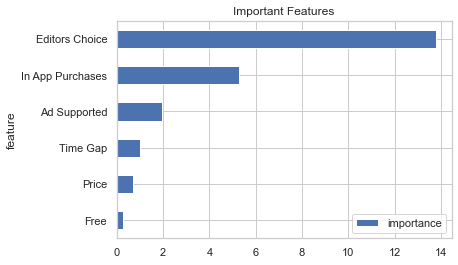

,feature,importance
4,Editors Choice,13.761855
3,In App Purchases,5.274470
2,Ad Supported,1.955677
5,Time Gap,0.999355
1,Price,0.703430
0,Free,0.273074


In [13]:
# make a list of all independent features
feature_names = smote_data_x.columns.to_list()
model = LogisticRegression(random_state=0).fit(googleplayclean[feature_names].values, googleplayclean["Success"].values)
# get the scores
score = model.score(googleplayclean[feature_names].values, googleplayclean['Success'].values)
print("Model Score = {}".format(score))
w0 = model.intercept_[0]
w = model.coef_[0]

# important features
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending = False)
feature_importance = feature_importance[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
ax = feature_importance.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importance

In [14]:
# make a list of all features
feature_importance_list = feature_importance['feature'].to_list()

# create the X with all important features only
x = smote_data_x[feature_importance_list]
y = smote_data_y['Success']

In [15]:
x = pd.get_dummies(x, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [16]:
#Split the dataset to test and train data
x_train, x_test, y_train, y_test = sk.train_test_split(x, y, test_size=0.2, random_state=0)
logit_model=sm.Logit(y_train,x_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.546454
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.212      
Dependent Variable:   Success           AIC:               235332.7557
Date:                 2022-04-22 04:38  BIC:               235394.4349
No. Observations:     215316            Log-Likelihood:    -1.1766e+05
Df Model:             5                 LL-Null:           -1.4925e+05
Df Residuals:         215310            LLR p-value:       0.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Time Gap              -0.0006   0.0000 -70.1162 0.0000 -0.0006 -0.0006
Pri

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(x_test,y_test)))

Logistic Regression Model Accuracy: 0.74


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


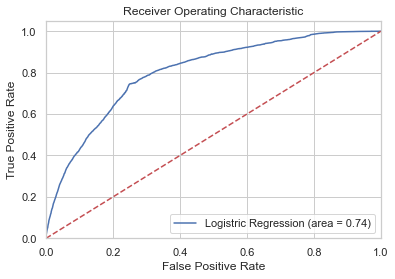

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("Accuracy Score = {}".format(ac))
print("TNR = {}".format(20451/(20451+6477)))
print("TPR = {}".format(19190/(19190+7712)))

[[20451  6477]
 [ 7712 19190]]
Accuracy Score = 0.7364109232769831
TNR = 0.759469696969697
TPR = 0.7133298639506357


# Logistic Regression for Puzzle Games


In [20]:
puzzle_0 = ['Puzzle']
puzzleNotExist = ~puzzle['Category'].isin(puzzle_0)
puzzleNotExist_rows = puzzle[puzzleNotExist]

In [21]:
puzzle = puzzle.drop(puzzleNotExist_rows.index)

In [22]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(puzzle[var], prefix=var)
    data1 = puzzle.join(cat_list)
    puzzle = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = puzzle.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]


In [23]:
print(puzzle['Success'].value_counts())
print(puzzle.Success.value_counts() / len(puzzle))

False    28011
True      1935
Name: Success, dtype: int64
False    0.935384
True     0.064616
Name: Success, dtype: float64


In [24]:
# dependent variable
yP = puzzle[['Success']]
# independent variables
xP = puzzle[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
osP = SMOTE(random_state = 0)
xP_train, xP_test, yP_train, yP_test = sk.train_test_split(xP, yP, test_size = 0.2, random_state=0)
columnsP = xP_train.columns

smote_data_xP, smote_data_yP = osP.fit_resample(xP_train, yP_train)
smote_data_xP = pd.DataFrame(data = smote_data_xP, columns = columnsP)
smote_data_yP = pd.DataFrame(data = smote_data_yP, columns = ['Success'])

In [25]:
smote_data_xP

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,False,False,1551
1,True,0.0,True,False,False,1446
2,True,0.0,True,False,False,824
3,True,0.0,False,False,False,1223
4,True,0.0,True,False,False,1081
...,...,...,...,...,...,...
44837,True,0.0,True,True,False,107
44838,True,0.0,True,True,False,139
44839,True,0.0,True,True,True,89
44840,True,0.0,True,True,False,162


In [26]:
smote_data_yP

,Success
0,False
1,False
2,False
3,False
4,False
...,...
44837,True
44838,True
44839,True
44840,True


In [27]:
print( "% of each class in the original dataset -")
print(puzzle.Success.value_counts() / len(puzzle))

% of each class in the original dataset -
False    0.935384
True     0.064616
Name: Success, dtype: float64


In [28]:
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_yP.Success.value_counts() / len(puzzle))

% of each class in SMOTE sampled dataset -
False    0.748714
True     0.748714
Name: Success, dtype: float64


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score = 0.9367528217458091


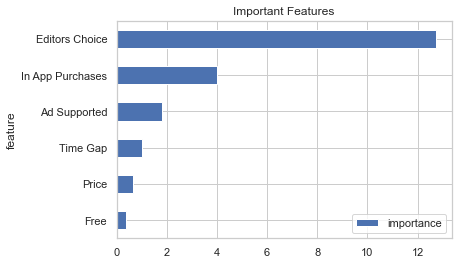

,feature,importance
4,Editors Choice,12.720054
3,In App Purchases,3.989214
2,Ad Supported,1.794591
5,Time Gap,0.998890
1,Price,0.642196
0,Free,0.371177


In [29]:
# make a list of all independent features
feature_namesP = smote_data_xP.columns.to_list()
modelP = LogisticRegression(random_state=0).fit(puzzle[feature_names].values, puzzle["Success"].values)
# get the scores
scoreP = modelP.score(puzzle[feature_names].values, puzzle['Success'].values)
print("Model Score = {}".format(scoreP))
w0 = modelP.intercept_[0]
w = modelP.coef_[0]

# important features
feature_importanceP = pd.DataFrame(feature_namesP, columns = ["feature"])
feature_importanceP["importance"] = pow(math.e, w)
feature_importanceP = feature_importanceP.sort_values(by = ["importance"], ascending = False)
feature_importanceP = feature_importanceP[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
ax = feature_importanceP.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importanceP

In [30]:
# make a list of all features
feature_importance_listP = feature_importanceP['feature'].to_list()

# create the X with all important features only
xP = smote_data_xP[feature_importance_listP]
yP = smote_data_yP['Success']

In [31]:
xP = pd.get_dummies(xP, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [32]:
#Split the dataset to test and train data
xP_train, xP_test, yP_train, yP_test = sk.train_test_split(xP, yP, test_size=0.2, random_state=0)
logit_modelP=sm.Logit(yP_train,xP_train)
result = logit_modelP.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.497592
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.282     
Dependent Variable:    Success           AIC:               35712.2205
Date:                  2022-04-22 04:38  BIC:               35763.1469
No. Observations:      35873             Log-Likelihood:    -17850.   
Df Model:              5                 LL-Null:           -24865.   
Df Residuals:          35867             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Time Gap              -0.0007   0.0000 -31.2130 0.0000 -0.0008 -0.0007
Pri

In [33]:
logreg = LogisticRegression()
logreg.fit(xP_train, yP_train)
yP_pred = logreg.predict(xP_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(xP_test,yP_test)))

Logistic Regression Model Accuracy: 0.79


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


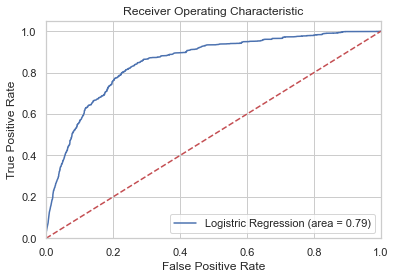

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yP_test, logreg.predict(xP_test))
fpr, tpr, thresholds = roc_curve(yP_test, logreg.predict_proba(xP_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmP = confusion_matrix(yP_test, yP_pred)
acP = accuracy_score(yP_test, yP_pred)
print(cmP)
print("Accuracy Score = {}".format(acP))
print("TNR = {}".format(3393/(3393+1088)))
print("TPR = {}".format(3663/(3663+825)))

[[3393 1088]
 [ 825 3663]]
Accuracy Score = 0.7867097781246516
TNR = 0.7571970542289668
TPR = 0.8161764705882353


# Using Logistic Regression for Casual Games

In [36]:
casual_0 = ['Casual']
casualNotExist = ~casual['Category'].isin(casual_0)
casualNotExist_rows = casual[casualNotExist]
casual = casual.drop(casualNotExist_rows.index)

In [37]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(casual[var], prefix=var)
    data1 = casual.join(cat_list)
    casual = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = casual.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [38]:
print(casual['Success'].value_counts())
print(casual.Success.value_counts() / len(casual))

False    25445
True      2087
Name: Success, dtype: int64
False    0.924197
True     0.075803
Name: Success, dtype: float64


In [39]:
# dependent variable
yC = casual[['Success']]
# independent variables
xC = casual[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
osC = SMOTE(random_state = 0)
xC_train, xC_test, yC_train, yC_test = sk.train_test_split(xC, yC, test_size = 0.2, random_state=0)
columnsC = xC_train.columns

smote_data_xC, smote_data_yC = osC.fit_resample(xC_train, yC_train)
smote_data_xC = pd.DataFrame(data = smote_data_xC, columns = columnsC)
smote_data_yC = pd.DataFrame(data = smote_data_yC, columns = ['Success'])

In [40]:
smote_data_xC

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,False,False,1334
1,True,0.0,True,False,False,984
2,True,0.0,True,False,False,1836
3,True,0.0,True,False,False,621
4,True,0.0,True,False,False,55
...,...,...,...,...,...,...
40759,True,0.0,True,True,False,51
40760,True,0.0,True,True,False,118
40761,True,0.0,True,True,False,153
40762,True,0.0,True,False,False,13


In [41]:
smote_data_yC

,Success
0,False
1,False
2,False
3,False
4,False
...,...
40759,True
40760,True
40761,True
40762,True


In [42]:
print( "% of each class in the original dataset -")
print(casual.Success.value_counts() / len(casual))
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_yC.Success.value_counts() / len(casual))

% of each class in the original dataset -
False    0.924197
True     0.075803
Name: Success, dtype: float64
% of each class in SMOTE sampled dataset -
False    0.740302
True     0.740302
Name: Success, dtype: float64


Model Score = 0.9255411884352753


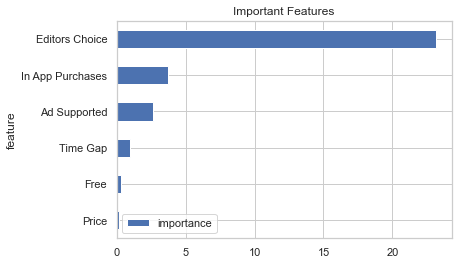

,feature,importance
4,Editors Choice,23.134304
3,In App Purchases,3.706964
2,Ad Supported,2.654070
5,Time Gap,0.999440
0,Free,0.334375
1,Price,0.134804


In [43]:
# make a list of all independent features
feature_namesC = smote_data_xC.columns.to_list()
modelC = LogisticRegression(random_state=0).fit(casual[feature_names].values, casual["Success"].values)
# get the scores
scoreC = modelC.score(casual[feature_namesC].values, casual['Success'].values)
print("Model Score = {}".format(scoreC))
w0 = modelC.intercept_[0]
w = modelC.coef_[0]

# important features
feature_importanceC = pd.DataFrame(feature_namesC, columns = ["feature"])
feature_importanceC["importance"] = pow(math.e, w)
feature_importanceC = feature_importanceC.sort_values(by = ["importance"], ascending = False)
feature_importanceC = feature_importanceC[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
axC = feature_importanceC.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importanceC

In [44]:
# make a list of all features
feature_importance_listC = feature_importanceC['feature'].to_list()

# create the X with all important features only
xC = smote_data_xC[feature_importance_listC]
yC = smote_data_yC['Success']
xC = pd.get_dummies(xC, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [45]:
#Split the dataset to test and train data
xC_train, xC_test, yC_train, yC_test = sk.train_test_split(xC, yC, test_size=0.2, random_state=0)
logit_modelC=sm.Logit(yC_train,xC_train)
result = logit_modelC.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.538389
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.223     
Dependent Variable:    Success           AIC:               35126.7849
Date:                  2022-04-22 04:38  BIC:               35177.1394
No. Observations:      32611             Log-Likelihood:    -17557.   
Df Model:              5                 LL-Null:           -22604.   
Df Residuals:          32605             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Time Gap              -0.0004   0.0000 -18.7043 0.0000 -0.0004 -0.0003
Pri

In [46]:
logreg = LogisticRegression()
logreg.fit(xC_train, yC_train)
yC_pred = logreg.predict(xC_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(xC_test,yC_test)))

Logistic Regression Model Accuracy: 0.75


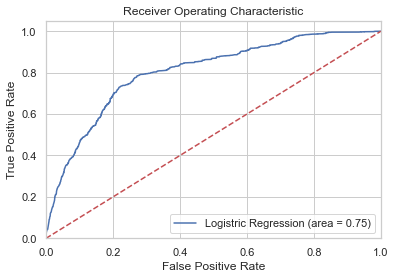

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yC_test, logreg.predict(xC_test))
fpr, tpr, thresholds = roc_curve(yC_test, logreg.predict_proba(xC_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmC = confusion_matrix(yC_test, yC_pred)
acC = accuracy_score(yC_test, yC_pred)
print(cmC)
print("Accuracy Score = {}".format(acC))
print("TNR = {}".format(3241/(3241+835)))
print("TPR = {}".format(2867/(2867+1210)))

[[3241  835]
 [1210 2867]]
Accuracy Score = 0.7491720838954986
TNR = 0.7951422963689893
TPR = 0.7032131469217562


# Using Logistic Regression on Arcade Games

In [49]:
arcade_0 = ['Arcade']
arcadeNotExist = ~arcade['Category'].isin(arcade_0)
arcadeNotExist_rows = arcade[arcadeNotExist]
arcade = arcade.drop(arcadeNotExist_rows.index)

In [50]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(arcade[var], prefix=var)
    data1 = arcade.join(cat_list)
    arcade = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = arcade.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [51]:
print(arcade['Success'].value_counts())
print(arcade.Success.value_counts() / len(arcade))

False    27781
True      1396
Name: Success, dtype: int64
False    0.952154
True     0.047846
Name: Success, dtype: float64


In [52]:
# dependent variable
yAr = arcade[['Success']]
# independent variables
xAr = arcade[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
osAr = SMOTE(random_state = 0)
xAr_train, xAr_test, yAr_train, yAr_test = sk.train_test_split(xAr, yAr, test_size = 0.2, random_state=0)
columnsAr = xAr_train.columns

smote_data_xAr, smote_data_yAr = osAr.fit_resample(xAr_train, yAr_train)
smote_data_xAr = pd.DataFrame(data = smote_data_xAr, columns = columnsAr)
smote_data_yAr = pd.DataFrame(data = smote_data_yAr, columns = ['Success'])

In [53]:
smote_data_xAr

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,True,False,2456
1,True,0.0,True,False,False,1132
2,True,0.0,True,True,False,583
3,True,0.0,True,False,False,2099
4,True,0.0,True,False,False,1866
...,...,...,...,...,...,...
44381,True,0.0,True,True,False,981
44382,True,0.0,True,True,False,16
44383,True,0.0,True,True,False,97
44384,True,0.0,True,True,False,104


In [54]:
smote_data_yAr

,Success
0,True
1,False
2,False
3,False
4,False
...,...
44381,True
44382,True
44383,True
44384,True


In [55]:
print( "% of each class in the original dataset -")
print(arcade.Success.value_counts() / len(arcade))
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_yAr.Success.value_counts() / len(arcade))

% of each class in the original dataset -
False    0.952154
True     0.047846
Name: Success, dtype: float64
% of each class in SMOTE sampled dataset -
True     0.760633
False    0.760633
Name: Success, dtype: float64


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score = 0.9527024711245159


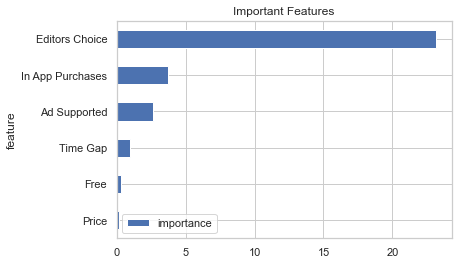

,feature,importance
4,Editors Choice,23.134304
3,In App Purchases,3.706964
2,Ad Supported,2.654070
5,Time Gap,0.999440
0,Free,0.334375
1,Price,0.134804


In [56]:
# make a list of all independent features
feature_namesAr = smote_data_xAr.columns.to_list()
modelAr = LogisticRegression(random_state=0).fit(arcade[feature_names].values, arcade["Success"].values)
# get the scores
scoreAr = modelAr.score(arcade[feature_namesAr].values, arcade['Success'].values)
print("Model Score = {}".format(scoreAr))

# important features
feature_importanceAr = pd.DataFrame(feature_namesAr, columns = ["feature"])
feature_importanceAr["importance"] = pow(math.e, w)
feature_importanceAr = feature_importanceAr.sort_values(by = ["importance"], ascending = False)
feature_importanceAr = feature_importanceAr[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
axAr = feature_importanceAr.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importanceAr

In [57]:
# make a list of all features
feature_importance_listAr = feature_importanceAr['feature'].to_list()

# create the X with all important features only
xAr = smote_data_xAr[feature_importance_listAr]
yAr = smote_data_yAr['Success']
xAr = pd.get_dummies(xAr, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [58]:
#Split the dataset to test and train data
xAr_train, xAr_test, yAr_train, yAr_test = sk.train_test_split(xAr, yAr, test_size=0.2, random_state=0)
logit_modelAr=sm.Logit(yAr_train,xAr_train)
result = logit_modelAr.fit()
print(result.summary2())

         Current function value: 0.455273
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.343     
Dependent Variable:      Success              AIC:                  32343.6932
Date:                    2022-04-22 04:38     BIC:                  32394.5583
No. Observations:        35508                Log-Likelihood:       -16166.   
Df Model:                5                    LL-Null:              -24612.   
Df Residuals:            35502                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
Time Gap          

C:\Users\davyn\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
logreg = LogisticRegression()
logreg.fit(xAr_train, yAr_train)
yAr_pred = logreg.predict(xAr_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(xAr_test,yAr_test)))

Logistic Regression Model Accuracy: 0.82


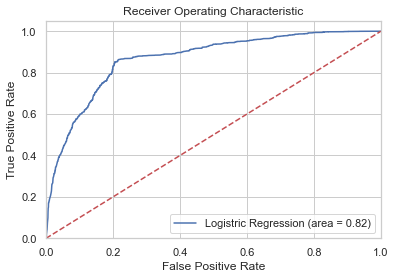

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yAr_test, logreg.predict(xAr_test))
fpr, tpr, thresholds = roc_curve(yAr_test, logreg.predict_proba(xAr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmAr = confusion_matrix(yAr_test, yAr_pred)
acAr = accuracy_score(yAr_test, yAr_pred)
print(cmAr)
print("Accuracy Score = {}".format(acAr))
print("TNR = {}".format(3521/(3521+913)))
print("TPR = {}".format(3780/(3780+664)))

[[3521  913]
 [ 664 3780]]
Accuracy Score = 0.8223699031313358
TNR = 0.7940911141181777
TPR = 0.8505850585058505


# Using Logistic Regression for Simulation Games

In [62]:
sim_0 = ['Simulation']
simNotExist = ~sim['Category'].isin(sim_0)
simNotExist_rows = sim[simNotExist]
sim = sim.drop(simNotExist_rows.index)

In [63]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(sim[var], prefix=var)
    data1 = sim.join(cat_list)
    sim = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = sim.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [64]:
print(sim['Success'].value_counts())
print(sim.Success.value_counts() / len(sim))

False    16232
True      1958
Name: Success, dtype: int64
False    0.892358
True     0.107642
Name: Success, dtype: float64


In [65]:
# dependent variable
yS = sim[['Success']]
# independent variables
xS = sim[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
osS = SMOTE(random_state = 0)
xS_train, xS_test, yS_train, yS_test = sk.train_test_split(xS, yS, test_size = 0.2, random_state=0)
columnsS = xS_train.columns

smote_data_xS, smote_data_yS = osS.fit_resample(xS_train, yS_train)
smote_data_xS = pd.DataFrame(data = smote_data_xS, columns = columnsS)
smote_data_yS = pd.DataFrame(data = smote_data_yS, columns = ['Success'])

In [66]:
smote_data_xS

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,False,False,96
1,True,0.0,True,True,False,1273
2,True,0.0,True,True,False,35
3,True,0.0,True,False,False,178
4,True,0.0,True,False,False,766
...,...,...,...,...,...,...
25947,True,0.0,True,True,False,364
25948,True,0.0,True,True,False,1199
25949,True,0.0,True,False,False,24
25950,True,0.0,True,True,False,47


In [67]:
smote_data_yS

,Success
0,False
1,True
2,False
3,False
4,False
...,...
25947,True
25948,True
25949,True
25950,True


In [68]:
print( "% of each class in the original dataset -")
print(sim.Success.value_counts() / len(sim))
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_yS.Success.value_counts() / len(sim))

% of each class in the original dataset -
False    0.892358
True     0.107642
Name: Success, dtype: float64
% of each class in SMOTE sampled dataset -
False    0.713359
True     0.713359
Name: Success, dtype: float64


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score = 0.8951072017592083


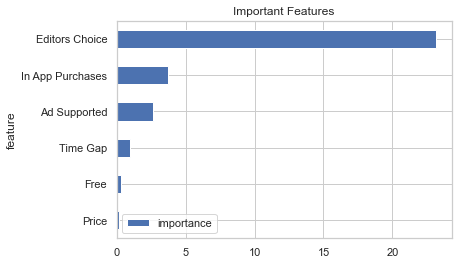

,feature,importance
4,Editors Choice,23.134304
3,In App Purchases,3.706964
2,Ad Supported,2.654070
5,Time Gap,0.999440
0,Free,0.334375
1,Price,0.134804


In [69]:
# make a list of all independent features
feature_namesS = smote_data_xS.columns.to_list()
modelS = LogisticRegression(random_state=0).fit(sim[feature_names].values, sim["Success"].values)
# get the scores
scoreS = modelS.score(sim[feature_namesS].values, sim['Success'].values)
print("Model Score = {}".format(scoreS))

# important features
feature_importanceS = pd.DataFrame(feature_namesS, columns = ["feature"])
feature_importanceS["importance"] = pow(math.e, w)
feature_importanceS = feature_importanceS.sort_values(by = ["importance"], ascending = False)
feature_importanceS = feature_importanceS[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
axS = feature_importanceS.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importanceS

In [70]:
# make a list of all features
feature_importance_listS = feature_importanceS['feature'].to_list()

# create the X with all important features only
xS = smote_data_xS[feature_importance_listS]
yS = smote_data_yS['Success']
xS = pd.get_dummies(xS, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [71]:
#Split the dataset to test and train data
xS_train, xS_test, yS_train, yS_test = sk.train_test_split(xS, yS, test_size=0.2, random_state=0)
logit_modelS=sm.Logit(yS_train,xS_train)
result = logit_modelS.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.556591
         Iterations 10
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.197     
Dependent Variable:    Success           AIC:               23122.7781
Date:                  2022-04-22 04:38  BIC:               23170.4231
No. Observations:      20761             Log-Likelihood:    -11555.   
Df Model:              5                 LL-Null:           -14390.   
Df Residuals:          20755             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        10.0000                                        
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Time Gap              -0.0000   0.0000  -1.0126 0.3112 -0.0001  0.0000
Pr

In [72]:
logreg = LogisticRegression()
logreg.fit(xS_train, yS_train)
yS_pred = logreg.predict(xS_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(xS_test,yS_test)))

Logistic Regression Model Accuracy: 0.74


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


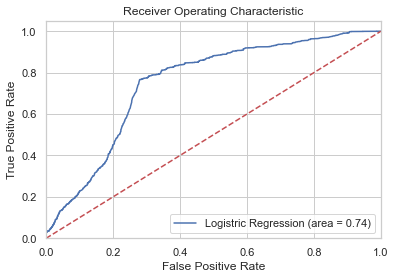

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yS_test, logreg.predict(xS_test))
fpr, tpr, thresholds = roc_curve(yS_test, logreg.predict_proba(xS_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmS = confusion_matrix(yS_test, yS_pred)
acS = accuracy_score(yS_test, yS_pred)
print(cmS)
print("Accuracy Score = {}".format(acS))
print("TNR = {}".format(1838/(1838+717)))
print("TPR = {}".format(2021/(2021+615)))

[[1838  717]
 [ 615 2021]]
Accuracy Score = 0.7434020419957619
TNR = 0.7193737769080235
TPR = 0.7666919575113809


# Using Logistic Regression on Action Games

In [75]:
action_0 = ['Action']
actionNotExist = ~action['Category'].isin(action_0)
actionNotExist_rows = action[actionNotExist]
action = action.drop(actionNotExist_rows.index)

In [76]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(action[var], prefix=var)
    data1 = action.join(cat_list)
    action = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = action.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [77]:
print(action['Success'].value_counts())
print(action.Success.value_counts() / len(action))

False    15415
True      1679
Name: Success, dtype: int64
False    0.901778
True     0.098222
Name: Success, dtype: float64


In [78]:
# dependent variable
yA = action[['Success']]
# independent variables
xA = action[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
osA = SMOTE(random_state = 0)
xA_train, xA_test, yA_train, yA_test = sk.train_test_split(xA, yA, test_size = 0.2, random_state=0)
columnsA = xA_train.columns

smote_data_xA, smote_data_yA = osA.fit_resample(xA_train, yA_train)
smote_data_xA = pd.DataFrame(data = smote_data_xA, columns = columnsA)
smote_data_yA = pd.DataFrame(data = smote_data_yA, columns = ['Success'])

In [79]:
smote_data_xA

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,False,False,42
1,True,0.0,True,False,False,277
2,True,0.0,True,False,False,681
3,True,0.0,True,False,False,1535
4,True,0.0,True,False,False,196
...,...,...,...,...,...,...
24623,True,0.0,True,True,False,622
24624,True,0.0,True,True,False,70
24625,True,0.0,True,True,False,118
24626,True,0.0,True,True,False,1316


In [80]:
smote_data_yA

,Success
0,False
1,False
2,False
3,False
4,False
...,...
24623,True
24624,True
24625,True
24626,True


In [81]:
print( "% of each class in the original dataset -")
print(action.Success.value_counts() / len(action))
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_yA.Success.value_counts() / len(action))

% of each class in the original dataset -
False    0.901778
True     0.098222
Name: Success, dtype: float64
% of each class in SMOTE sampled dataset -
False    0.72037
True     0.72037
Name: Success, dtype: float64


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score = 0.9047619047619048


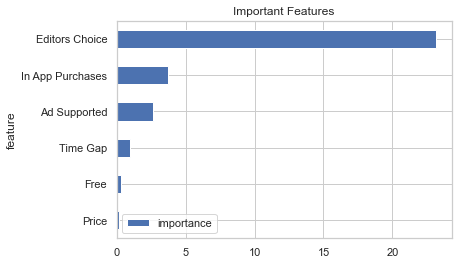

,feature,importance
4,Editors Choice,23.134304
3,In App Purchases,3.706964
2,Ad Supported,2.654070
5,Time Gap,0.999440
0,Free,0.334375
1,Price,0.134804


In [82]:
# make a list of all independent features
feature_namesA = smote_data_xA.columns.to_list()
modelA = LogisticRegression(random_state=0).fit(action[feature_names].values, action["Success"].values)
# get the scores
scoreA = modelA.score(action[feature_namesA].values, action['Success'].values)
print("Model Score = {}".format(scoreA))

# important features
feature_importanceA = pd.DataFrame(feature_namesA, columns = ["feature"])
feature_importanceA["importance"] = pow(math.e, w)
feature_importanceA = feature_importanceA.sort_values(by = ["importance"], ascending = False)
feature_importanceA = feature_importanceA[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
axA = feature_importanceA.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importanceA

In [83]:
# make a list of all features
feature_importance_listA = feature_importanceA['feature'].to_list()

# create the X with all important features only
xA = smote_data_xA[feature_importance_listA]
yA = smote_data_yA['Success']
xA = pd.get_dummies(xA, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [84]:
#Split the dataset to test and train data
xA_train, xA_test, yA_train, yA_test = sk.train_test_split(xA, yA, test_size=0.2, random_state=0)
logit_modelA=sm.Logit(yA_train,xA_train)
result = logit_modelA.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.493558
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.288     
Dependent Variable:    Success           AIC:               19460.1423
Date:                  2022-04-22 04:38  BIC:               19507.4731
No. Observations:      19702             Log-Likelihood:    -9724.1   
Df Model:              5                 LL-Null:           -13656.   
Df Residuals:          19696             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Time Gap              -0.0003   0.0000  -9.8038 0.0000 -0.0003 -0.0002
Pri

In [85]:
logreg = LogisticRegression()
logreg.fit(xA_train, yA_train)
yA_pred = logreg.predict(xA_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(xA_test,yA_test)))

Logistic Regression Model Accuracy: 0.79


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


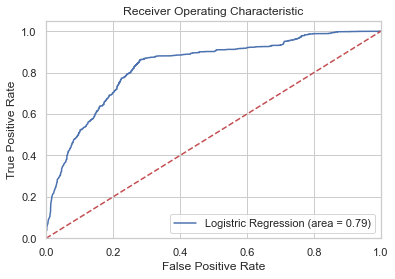

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yA_test, logreg.predict(xA_test))
fpr, tpr, thresholds = roc_curve(yA_test, logreg.predict_proba(xA_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmA = confusion_matrix(yA_test, yA_pred)
acA = accuracy_score(yA_test, yA_pred)
print(cmA)
print("Accuracy Score = {}".format(acA))
print("TNR = {}".format(1778/(1778+685)))
print("TPR = {}".format(2099/(2099+364)))

[[1778  685]
 [ 364 2099]]
Accuracy Score = 0.7870483150629314
TNR = 0.7218838814453918
TPR = 0.8522127486804709


# Using Logistic Regression on Adventure Games

In [88]:
adv_0 = ['Adventure']
advNotExist = ~adv['Category'].isin(adv_0)
advNotExist_rows = adv[advNotExist]
adv = adv.drop(advNotExist_rows.index)

In [89]:
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(adv[var], prefix=var)
    data1 = adv.join(cat_list)
    adv = data1
cat_vars=['Free', 'Size', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']
data_vars = adv.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [90]:
print(adv['Success'].value_counts())
print(adv.Success.value_counts() / len(adv))

False    14151
True       843
Name: Success, dtype: int64
False    0.943778
True     0.056222
Name: Success, dtype: float64


In [91]:
# dependent variable
yAdv = adv[['Success']]
# independent variables
xAdv = adv[['Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Time Gap']]
# not using size, as the numbers are too similar when compared with size
osAdv = SMOTE(random_state = 0)
xAdv_train, xAdv_test, yAdv_train, yAdv_test = sk.train_test_split(xAdv, yAdv, test_size = 0.2, random_state=0)
columnsAdv = xAdv_train.columns

smote_data_xAdv, smote_data_yAdv = osAdv.fit_resample(xAdv_train, yAdv_train)
smote_data_xAdv = pd.DataFrame(data = smote_data_xAdv, columns = columnsAdv)
smote_data_yAdv = pd.DataFrame(data = smote_data_yAdv, columns = ['Success'])

In [92]:
smote_data_xAdv

,Free,Price,Ad Supported,In App Purchases,Editors Choice,Time Gap
0,True,0.0,True,False,False,7
1,True,0.0,False,False,False,715
2,True,0.0,True,False,False,32
3,True,0.0,True,True,False,1209
4,True,0.0,True,False,False,474
...,...,...,...,...,...,...
22629,True,0.0,True,True,False,324
22630,True,0.0,True,True,False,30
22631,True,0.0,True,False,False,9
22632,True,0.0,True,True,False,13


In [93]:
smote_data_yAdv

,Success
0,False
1,False
2,False
3,False
4,False
...,...
22629,True
22630,True
22631,True
22632,True


In [94]:
print( "% of each class in the original dataset -")
print(adv.Success.value_counts() / len(adv))
print ( "% of each class in SMOTE sampled dataset -")
print (smote_data_yAdv.Success.value_counts() / len(adv))

% of each class in the original dataset -
False    0.943778
True     0.056222
Name: Success, dtype: float64
% of each class in SMOTE sampled dataset -
False    0.754769
True     0.754769
Name: Success, dtype: float64


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score = 0.9018369018369018


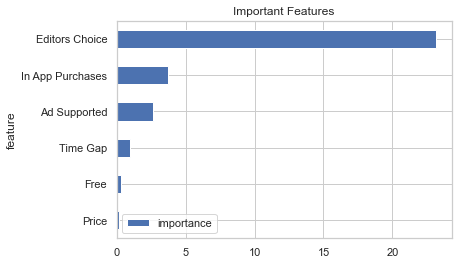

,feature,importance
4,Editors Choice,23.134304
3,In App Purchases,3.706964
2,Ad Supported,2.654070
5,Time Gap,0.999440
0,Free,0.334375
1,Price,0.134804


In [95]:
# make a list of all independent features
feature_namesAdv = smote_data_xAdv.columns.to_list()
modelAdv = LogisticRegression(random_state=0).fit(adv[feature_names].values, adv["Success"].values)
# get the scores
scoreAdv = modelAdv.score(action[feature_namesAdv].values, action['Success'].values)
print("Model Score = {}".format(scoreAdv))

# important features
feature_importanceAdv = pd.DataFrame(feature_namesAdv, columns = ["feature"])
feature_importanceAdv["importance"] = pow(math.e, w)
feature_importanceAdv = feature_importanceAdv.sort_values(by = ["importance"], ascending = False)
feature_importanceAdv = feature_importanceAdv[:10].sort_values(by = ["importance"], ascending = False)

# Visualisation
axAdv = feature_importanceAdv.sort_values(by = ["importance"], ascending=True).plot.barh(x = 'feature', y = 'importance')

plt.title('Important Features')
plt.show()

# Important Features
feature_importanceAdv

In [96]:
# make a list of all features
feature_importance_listAdv = feature_importanceAdv['feature'].to_list()

# create the X with all important features only
xAdv = smote_data_xAdv[feature_importance_listAdv]
yAdv = smote_data_yAdv['Success']
xAdv = pd.get_dummies(xAdv, columns=['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice'], drop_first=True)

In [97]:
#Split the dataset to test and train data
xAdv_train, xAdv_test, yAdv_train, yAdv_test = sk.train_test_split(xAdv, yAdv, test_size=0.2, random_state=0)
logit_modelAdv=sm.Logit(yAdv_train,xAdv_train)
result = logit_modelAdv.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.421461
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.392     
Dependent Variable:    Success           AIC:               15274.8035
Date:                  2022-04-22 04:38  BIC:               15321.6278
No. Observations:      18107             Log-Likelihood:    -7631.4   
Df Model:              5                 LL-Null:           -12551.   
Df Residuals:          18101             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Time Gap              -0.0005   0.0000 -14.9730 0.0000 -0.0006 -0.0005
Pri

In [98]:
logreg = LogisticRegression()
logreg.fit(xAdv_train, yAdv_train)
yAdv_pred = logreg.predict(xAdv_test)
print('Logistic Regression Model Accuracy: {:.2f}'.format(logreg.score(xAdv_test,yAdv_test)))

Logistic Regression Model Accuracy: 0.84


C:\Users\davyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


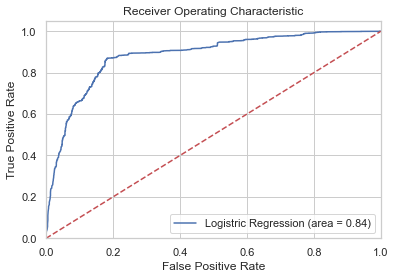

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yAdv_test, logreg.predict(xAdv_test))
fpr, tpr, thresholds = roc_curve(yAdv_test, logreg.predict_proba(xAdv_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmAdv = confusion_matrix(yAdv_test, yAdv_pred)
acAdv = accuracy_score(yAdv_test, yAdv_pred)
print(cmAdv)
print("Accuracy Score = {}".format(acAdv))
print("TNR = {}".format(1882/(1882+404)))
print("TPR = {}".format(1924/(1924+317)))

[[1882  404]
 [ 317 1924]]
Accuracy Score = 0.8407333775127016
TNR = 0.8232720909886264
TPR = 0.858545292280232
